In [7]:
import numpy as np
from matplotlib import pyplot as plt

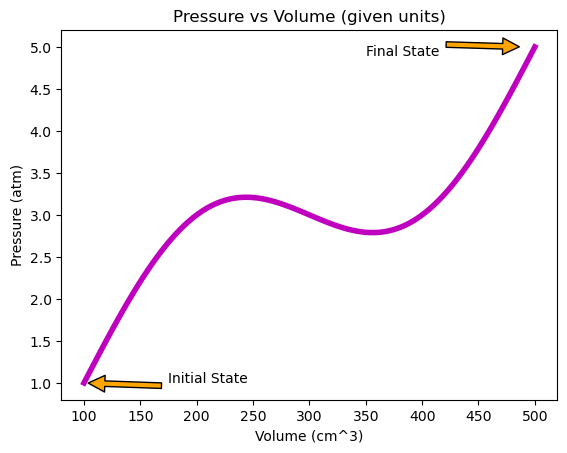

The initial volume is: 100.0 cm^3
The final volume is: 500.0 cm^3
The initial pressure is: 1.0 atm
The final pressure is: 5.0 atm


In [8]:
#GIVEN UNITS
data = np.genfromtxt('PV_HW2.txt', skip_header=1) #importing given data
volume = data[:, 0] #extracting volume from first column of data
pressure = data[:, 1] #extracting pressure from second column of data

plt.plot(volume, pressure, c='m', linewidth=4) #plotting pressure vs volume 

plt.annotate('Initial State', xy =(100, 1.0), xytext =(175, 1.0),arrowprops = 
             dict(facecolor ='orange', shrink = 0.05),) 
#labeling the initial state on the graph of initial pressure and volume
plt.annotate('Final State', xy =(490, 5.0), xytext =(350, 4.9),arrowprops = 
             dict(facecolor ='orange', shrink = 0.05),) 
#labeling the final state on the graph of initial pressure and volume

plt.xlabel("Volume (cm^3)") #in given units
plt.ylabel("Pressure (atm)") #in given units
plt.title("Pressure vs Volume (given units)")
plt.show()

#found the number of entries using len(volume) to find initial and final values
print("The initial volume is:", volume[0], "cm^3")
 #prints initial volume value from the array
print("The final volume is:", volume[99], "cm^3")
 #prints final volume value from the array
print("The initial pressure is:", pressure[0], "atm")
 #prints initial pressure value from the array
print("The final pressure is:", pressure[99], "atm")
 #prints final pressure value from the array

The initial volume is: 9.999999999999999e-05 m^3
The final volume is: 0.0005 m^3
The initial presure is: 101325.0 N/m^2
The final presure is: 506625.0 N/m^2


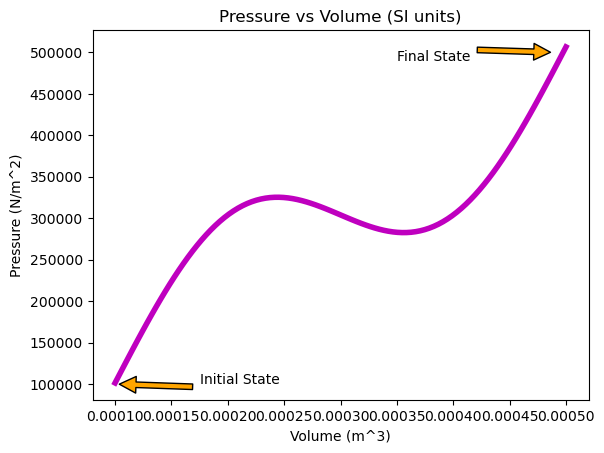

The area under the curve is: 120.0
The work is: -120.0 J


In [9]:
#SI UNITS
volume = data[:, 0] * (1.0 * 10 **(-6)) #converting to m^3
pressure = data[:, 1] * 101325 #converting to Pa or N/m^2

initial_volume = 100.0 * (1.0 * 10 **(-6)) #converting cm^3 to m^3
final_volume = 500.0 * (1.0 * 10 **(-6))
initial_pressure = 1.0 * 101325 #converting atm to Pa or N/m^2
final_pressure = 5.0 * 101325

print("The initial volume is:", initial_volume, "m^3")
 #printing initial volume in SI units
print("The final volume is:", final_volume, "m^3")
 #printing final volume in SI units
print("The initial presure is:", initial_pressure, "N/m^2")
 #printing initial pressure in SI units
print("The final presure is:", final_pressure, "N/m^2")
 #printing final pressure in SI units


plt.plot(volume, pressure, c='m', linewidth=4)

plt.annotate('Initial State', xy =(0.0001, 100000), xytext =(0.000175, 100000)
             ,arrowprops = dict(facecolor ='orange', shrink = 0.05),)
#labeling the initial state on the graph of initial pressure and volume
plt.annotate('Final State', xy =(0.00049, 500000), xytext =(0.00035, 490000)
             ,arrowprops = dict(facecolor ='orange', shrink = 0.05),) 
#labeling the final state on the graph of initial pressure and volume

plt.xlabel("Volume (m^3)") 
plt.ylabel("Pressure (N/m^2)")
plt.title("Pressure vs Volume (SI units)")
plt.show()

#trapezoidal rule to find area under the curve (integral)
area_under_curve = np.round(np.trapz(volume, pressure), decimals=-1)
 #using np.trapz to find area under the curve
work = -area_under_curve #see below for explanation
print("The area under the curve is:", area_under_curve)
print("The work is:", work, "J")

In [10]:
N = 6.022 * 10 **23 #given number of particles
K = 1.38 * 10 **(-23) #boltzmann constant

#defining equation to find temperature from ideal gas law (given assumption)
def temp(pressure, volume):
    ideal = (pressure * volume) / (N * K)
    return ideal

#units = (N/m^2 * m^3) / (1 * J/K)
# = Nm / (Nm / K) = K

initial_temp = temp(initial_pressure, initial_volume)
 #using defined formula and initial values to find initial temperature
final_temp = temp(final_pressure, final_volume)
 #using defined formula and final values to find final temperature
change_in_temp = final_temp - initial_temp
 #need change in temp to find the change in kinetic energy
print("The temperature change of the gas is:", change_in_temp, "K")

The temperature change of the gas is: 29.26227022656059 K


In [11]:
 #using change of kinetic energy equation
def kinetic_energy(temperature):
    f = 3 #monatomic, see below
    KE = (f/2) * N * K * temperature
    return KE

#units = 1 * J/K * K = J
#using np.round to get appropriate units 
change_in_KE = np.round(kinetic_energy(change_in_temp), decimals=-1)
print("The change in kinetic energy is:", change_in_KE, "J")
 #positive because final temp > initial temp

The change in kinetic energy is: 360.0 J


In [12]:
def heat(dKE, w):
    Q = dKE - w #finding heat with equation from first law of thermodynamics 
    return Q

#units = J - J = J

heat = np.round(heat(change_in_KE, work), decimals=-1)
print("The heat flow into the gas is:", heat, "J")

The heat flow into the gas is: 480.0 J


- The work is negative because as the pressure, volume, and temperature of the gas increase, the particles give some of their energy to the walls of the container. Increasing temperature and pressure causes the gas molecules to make more collisions with the wall of the container, therefore transferring some of their energy to the container. Work is a transfer of energy and since the molecules are giving energy to the container, the gas has a negative work
- We're told that the particles are monatomic and therefore know that they cannot bond to other molecules. This means that they have three degrees of freedom because they can only move in three dimensions. Additional bonds would allow for rotational kinetic energy, but singular molecules do not exhibit rotational kinetic energy, only translational. Here, we ignore vibrational kinetic energy because the temperature is not large enough 
- Equation from first law of thermodynamics: delta_E = Q + W + mu * delta_N. Since we know the number of particles is constant (given), we can cancel out the mu * delta_N term. In order to solve for heat, we can rearrange the equation to Q = delta_E - W. This equation yields a positive heat since the change in energy is positive and work is negative (subtracting a negative = adding a positive). And since the temperature of the gas is increasing, heat must be flowing into the gas, yielding a positive heat. I knew that my change in kinetic energy is equal to the change in total energy in this case for the following reasons: 
    - KE_bulk = 0 because the container is at rest throughout the data collection
    - PE_bulk = 0 because during data collection, the container remains at the same height 
    - PE_internal = 0 because there are no new bonds forming (we know that delta_f = 0)
    - E_rest = 0 because there is no adding or removing particles (constant N given)
    - E_chem = 0 because bonds aren't forming or breaking 